In [19]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def show_plot_snr(title, noisy, original):
    plt.figure(title, figsize=(4, 3), dpi=100)
    plt.axis('off')
    plt.title(title)
    plt.plot(noisy, label="Noisy")
    plt.plot(original, label="Original")
    plt.legend()
    plt.savefig(title + ".png", dpi=100, bbox_inches="tight")
    plt.show()

In [21]:
def get_snr_db(music, noise):
    music_power = np.var(music)
    noise_power = np.var(noise)
    return 10*np.log10(music_power / noise_power)

In [22]:
def get_sigma_from_snr_db(snr_db, music):
    x = np.log10(np.var(music))
    y = snr_db / 10
    return 10 ** ((x-y)/2)

In [23]:
fs0, music = wavfile.read("music.wav")
fs1, noise1 = wavfile.read("noise1.wav")
fs2, noise2 = wavfile.read("noise2.wav")
fs3, noise3 = wavfile.read("noise3.wav")

In [24]:
db_vals = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0] # some db values

In [25]:
noise_1_sigma = np.sqrt(np.var(noise1))
noise_2_sigma = np.sqrt(np.var(noise2))
noise_3_sigma = np.sqrt(np.var(noise3))
noise_sigma = [[noise1, noise_1_sigma, fs1], [noise2, noise_2_sigma, fs2], [noise3, noise_3_sigma, fs2]]

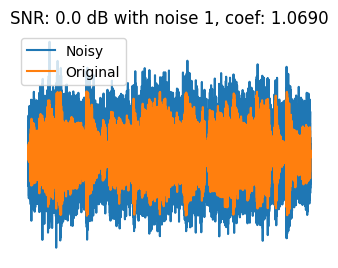

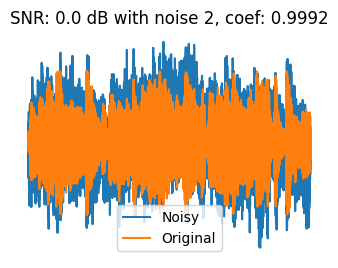

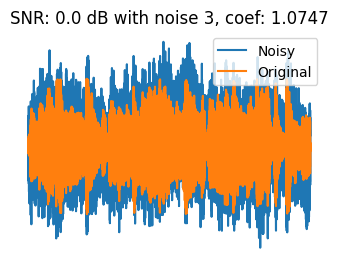

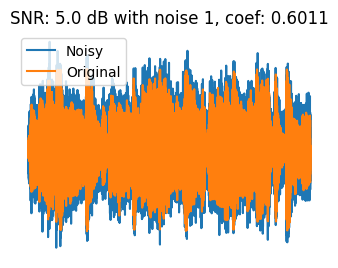

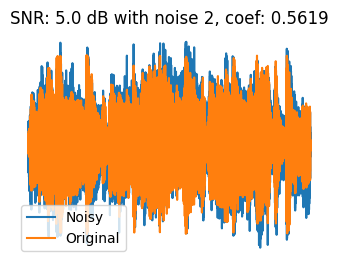

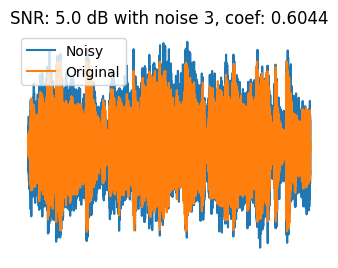

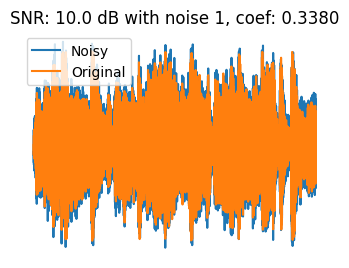

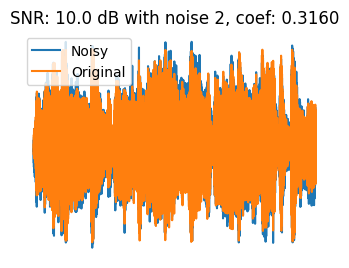

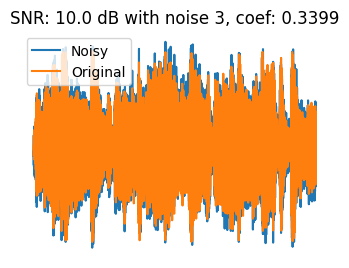

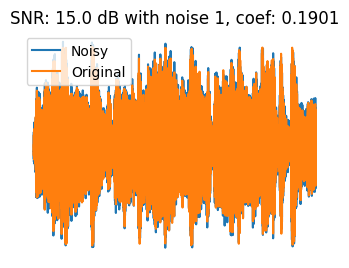

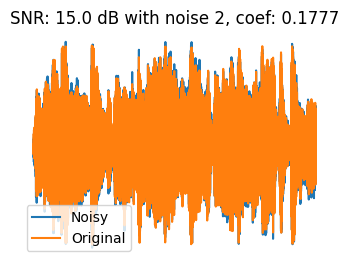

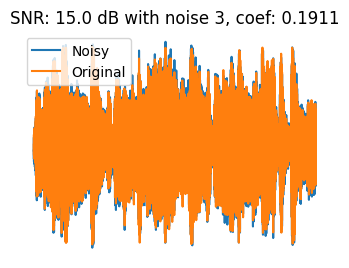

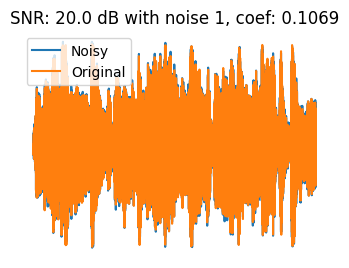

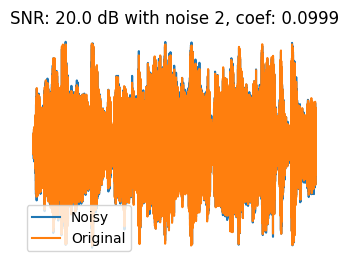

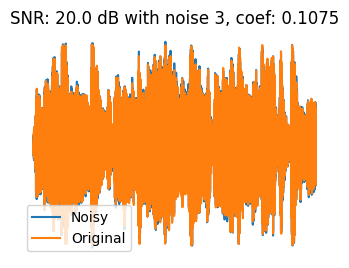

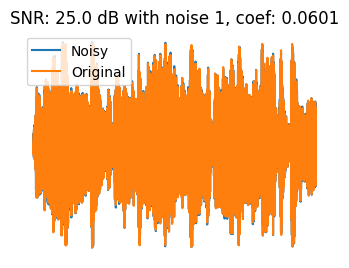

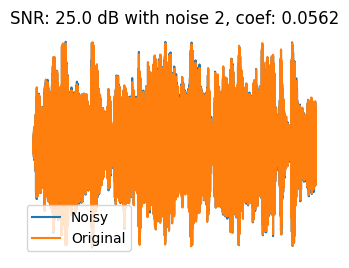

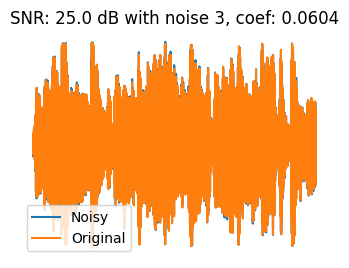

In [26]:
for db in db_vals:
    count = 0
    for noise in noise_sigma:
        count += 1
        needed_noise = get_sigma_from_snr_db(db, music)
        coef = needed_noise / noise[1] # noise[1]: sqrt of the variance of noise.wav data
        noisy_music = music + coef * noise[0] # noise[0]: noise .wav data
        
        coef = "{:.4f}".format(coef)
        
        wavfile.write("SNR_" + str(db) + "_dB_noise_" + str(count) + "_coef_" + coef + ".wav", noise[2], noisy_music)
        show_plot_snr("SNR: " + str(db) + " dB with noise " + str(count) + ", coef: " + coef, noisy_music, music)